# 今日任务Ⅱ：维数简约可视化

2. 给定的 digits 图像数据集，探讨 LDA 的降为效果

In [1]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 加载 digits(MNIST) 数据集
n_class = 10
digits = datasets.load_digits(n_class=n_class)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
y = y.astype(int)   # 将标签转换为整数

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 可视化超参数
colors = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'gray', 'cyan', 'yellow', 'brown']

def check_overlap(box1, box2):
    """
    判断两个矩形框是否有重叠
    """
    # box: (x, y, w, h)
    return not (box1[0] + box1[2] < box2[0] or box1[0] > box2[0] + box2[2] or box1[1] + box1[3] < box2[1] or box1[1] > box2[1] + box2[3])

def plot_digits(X, ax):
    """
    在每个点旁边显示数字图像，如果有碰撞则不显示
    """
    boxes = []
    for idx in range(len(X)):
        img = 255 - X_train[idx].reshape(8, 8)
        imagebox = OffsetImage(img, cmap='gray', zoom=1)
        ab = AnnotationBbox(imagebox, (X[idx, 0], X[idx, 1]), frameon=True, pad=0.5)
        ax.add_artist(ab)
        
        bbox = ab.get_window_extent(ax.figure.canvas.get_renderer())
        
        # 碰撞检测
        any_collision = False
        for box in boxes:
            if check_overlap(bbox.bounds, box.bounds):
                any_collision = True
                break
                
        if not any_collision:
            boxes.append(bbox)
        else:
            ab.remove()

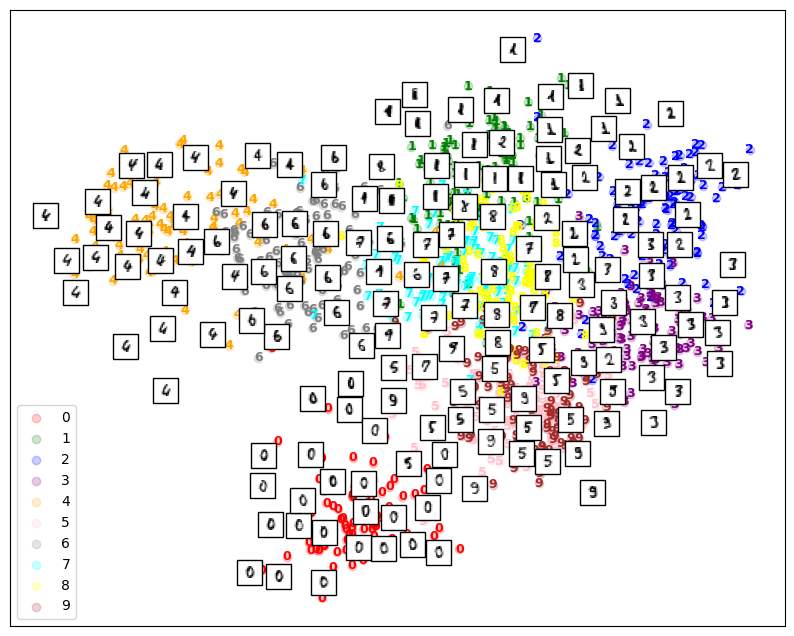

In [2]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 创建 LDA 模型并进行降维
lda = LDA(n_components=2)
X_r2 = lda.fit_transform(X_train, y_train)

# 绘制降维后的数据
fig, ax = plt.subplots(figsize=(10, 8))
# 绘制每个数字的散 label 图 
for i in range(n_class):
    for _X, _y in zip(X_r2[y_train == i], y_train[y_train == i]):
        plt.text(x=_X[_y == i, 0], y=_X[_y == i, 1], s=str(i),
                 color=colors[i], fontdict={'weight': 'bold', 'size': 9, 'ha': 'center', 'va': 'center'})
# 绘制每个数字的散点图
for i in range(len(colors)):
    plt.scatter(X_r2[y_train == i, 0], X_r2[y_train == i, 1], alpha=0.2, color=colors[i], label=str(i))
# 在每个点旁边显示数字图像，如果有碰撞则不显示
plot_digits(X_r2, ax)
# 不显示刻度，仅显示边框
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.setp(plt.gca(), xticks=[], yticks=[])
plt.show()


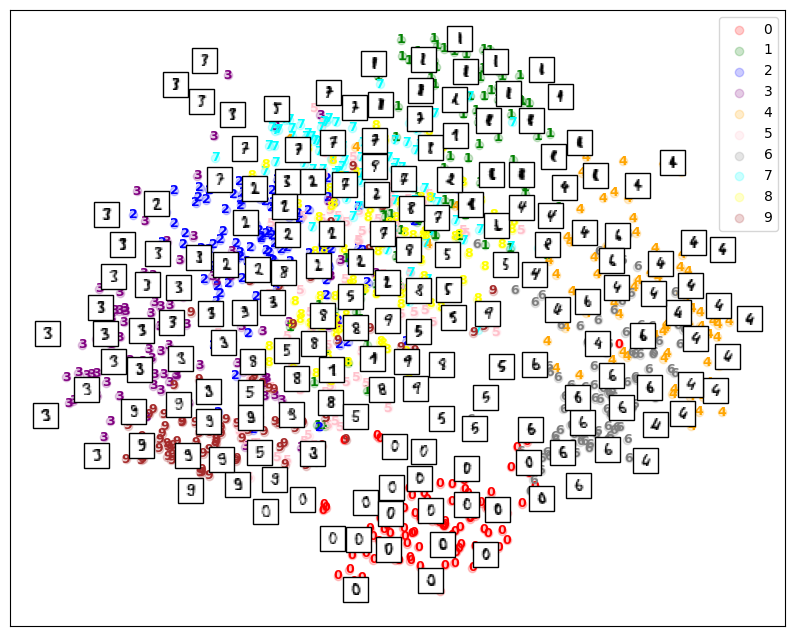

In [3]:

from sklearn.decomposition import PCA

# 创建 PCA 模型并进行降维
pca = PCA(n_components=2)
X_r1 = pca.fit_transform(X_train)

# 绘制降维后的数据
fig, ax = plt.subplots(figsize=(10, 8))
# 绘制每个数字的散 label 图 
for i in range(n_class):
    for _X, _y in zip(X_r1[y_train == i], y_train[y_train == i]):
        plt.text(x=_X[_y == i, 0], y=_X[_y == i, 1], s=str(i),
                 color=colors[i], fontdict={'weight': 'bold', 'size': 9, 'ha': 'center', 'va': 'center'})
# 绘制每个数字的散点图
for i in range(len(colors)):
    plt.scatter(X_r1[y_train == i, 0], X_r1[y_train == i, 1], alpha=0.2, color=colors[i], label=str(i))
# 在每个点旁边显示数字图像，如果有碰撞则不显示
plot_digits(X_r1, ax)
# 不显示刻度，仅显示边框
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.setp(plt.gca(), xticks=[], yticks=[])
plt.show()